# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [30]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:

absences=pd.read_csv(r'../data/absences.csv')

In [3]:
absences.head(10)

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9
5,5,6,58,7
6,6,7,29,14
7,7,8,36,11
8,8,9,64,5
9,9,10,40,8


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

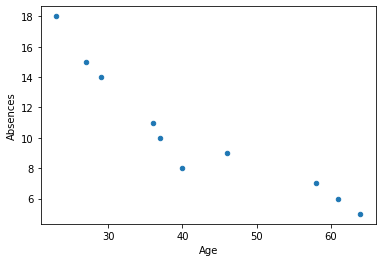

In [5]:
plot1 = absences.plot.scatter(x='Age', y='Absences')
plot1

In [ ]:
# your comments here

"""
There seems to be an inversely proportional relationship between Age and Absences. The younger you are, the more you skip days of work.
"""

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [ ]:
def slope_intercept(x1,x2,y1,y2):
    m = (y2-y1)/(x2-x1)
    intercept = y1-(m*x1)
    print(f"b = {intercept} & m ={m}")

In [28]:
slope_intercept(absences["Absences"][0],absences["Absences"][1],absences["Age"][0],absences["Age"][1])

b = 83.66666666666666 & m =-3.7777777777777777


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [31]:
slope, intercept, r_value, p_value, std_err = stats.linregress(absences['Age'], absences['Absences'])


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


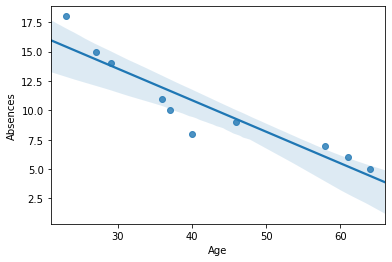

In [32]:
sns.regplot(x='Age',y='Absences', data=absences)

In [ ]:
"""
The plot shows a negative linear relationship between age and absences
"""

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [35]:
def covariance(x, y):
    x_mean = (sum(x)/len(x))
    y_mean = (sum(y)/len(y))
    data = [(x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x))]
    return sum(data) / (len(data) - 1)

In [36]:
def correlation(x, y):
    std1 = x.std()
    std2 = y.std()
    corr = (covariance(x, y)/(std1*std2))
    return corr

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [37]:
covariance(absences["Age"],absences["Absences"])

-57.699999999999996

In [38]:
correlation(absences["Age"],absences["Absences"])

-0.9325434092481012

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
"""
According to the data observed, there is a very strong negative relationship between age and absentism.
However, it is not possible to confirm that age is an indicator of absentism.
"""

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [39]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [40]:
correlation(ironbeers_df["X"],ironbeers_df["Y"])

0.9770084209183943

In [41]:
covariance(ironbeers_df["X"],ironbeers_df["Y"])

12.0

In [ ]:
"""
There is a strong correlation between the number of people I asked to stay and the ones who actually stayed
"""

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

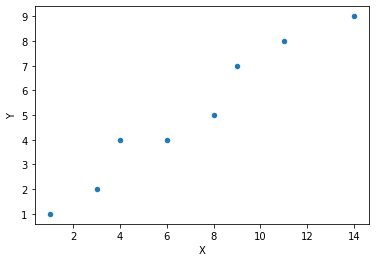

In [42]:
plot2 = ironbeers_df.plot.scatter(x='X', y='Y')
plot2

In [ ]:
"""
The observations seem to show a positive linear relationship
"""

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [43]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ironbeers_df['X'], ironbeers_df['Y'])


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


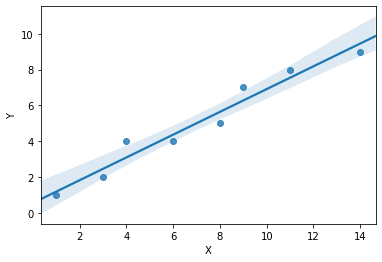

In [44]:
sns.regplot(x='X',y='Y', data=ironbeers_df)

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
"""
There's a strong positive relationship between the number of people I asked to stay and the ones who actually stayed.
However, I could not say that people are staying on Fridays because of me.

"""

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here